# Learning to create a Dataset, Dataloader and train a model

## 1. Downloading the data

In [1]:
!wget -O pneumonia.zip 'https://storage.googleapis.com/kaggle-data-sets/519943/964544/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1582811969&Signature=DKN5ndoVIjwRt54KXl%2B20tgt6s2oyRT4fqzkmwOKiiBOu8VqI1fi8XGsSmTd0xaSxIszgngbQrTtu%2FZW4fyM9VZfqOvtduFSUkIDCYbCLZj4XJEe7NIcFnD9EC8FE4EkAMowtdkT%2BiGza44yDASeka0mBQEy65OVw1WJTQU%2BZQyjjZ82xiL5f5ETdaIdZaGuszQ2p7R7DGyuync6e58ac4fkh281xx6OVqYzXcs6%2FMaHkA%2FoLzUJ7O4Nvz15zS1UoE09ATDhBL412kn9gL36vDMN3j5CfGAB1qePf8%2Bi1G323bQH9T8rJZtUi%2BQQx0tRqtnZmZD0jnD2KcYtwWXsag%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-images-for-classification-pneumonia.zip'

--2020-02-27 02:05:24--  https://storage.googleapis.com/kaggle-data-sets/519943/964544/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1582811969&Signature=DKN5ndoVIjwRt54KXl%2B20tgt6s2oyRT4fqzkmwOKiiBOu8VqI1fi8XGsSmTd0xaSxIszgngbQrTtu%2FZW4fyM9VZfqOvtduFSUkIDCYbCLZj4XJEe7NIcFnD9EC8FE4EkAMowtdkT%2BiGza44yDASeka0mBQEy65OVw1WJTQU%2BZQyjjZ82xiL5f5ETdaIdZaGuszQ2p7R7DGyuync6e58ac4fkh281xx6OVqYzXcs6%2FMaHkA%2FoLzUJ7O4Nvz15zS1UoE09ATDhBL412kn9gL36vDMN3j5CfGAB1qePf8%2Bi1G323bQH9T8rJZtUi%2BQQx0tRqtnZmZD0jnD2KcYtwWXsag%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-images-for-classification-pneumonia.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2451790510 (2.3G) [application/zip]
Saving to: ‘pneumonia.zip’

pneumonia.zip       

In [2]:
!unzip pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: pneumonia2/test/PNEUMONIA/person427_bacteria_1868.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person427_virus_875.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person428_bacteria_1869.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person436_bacteria_1883.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person438_bacteria_1889.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person438_virus_889.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person440_bacteria_1897.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person441_bacteria_1903.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person441_bacteria_1907.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person441_bacteria_1914.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person441_bacteria_1916.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person441_bacteria_1918.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person441_virus_895.jpeg  
  inflating: pneumonia2/test/PNEUMONIA/person441_vi

In [5]:
!ls pneumonia

test  train  validation


## 2. Creating the databunch

In [0]:
from fastai.vision import *
from fastai import *

In [0]:
data = ImageDataBunch.from_folder('pneumonia',valid='validation',size=224,bs=16)

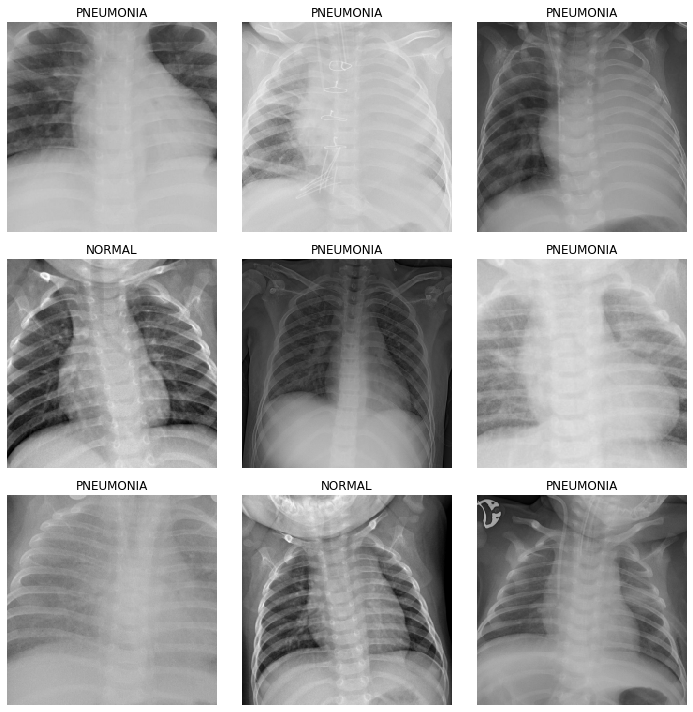

In [7]:
data.show_batch(rows=3,figsize=(10,10))

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns = ShowGraph)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


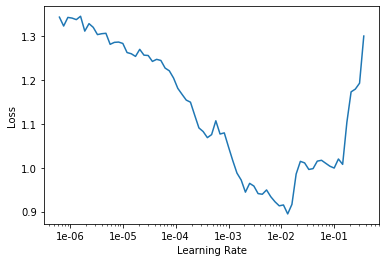

In [10]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.571533,0.316489,0.894198,02:45
1,0.370265,0.225659,0.928328,02:44
2,0.306925,0.248719,0.925768,02:41
3,0.297838,0.206771,0.940273,02:41
4,0.259746,0.209054,0.938567,02:42
5,0.205214,0.182176,0.947099,02:40
6,0.177722,0.179948,0.945392,02:40
7,0.141853,0.158966,0.952218,02:39
8,0.110914,0.192945,0.944539,02:38
9,0.121146,0.172857,0.950512,02:42


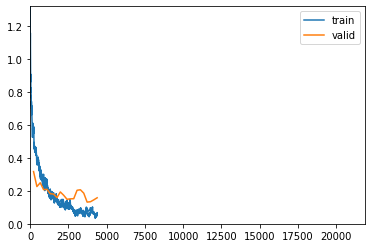

KeyboardInterrupt: ignored

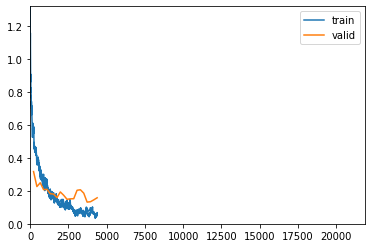

In [11]:
learn.fit_one_cycle(100,1e-3)